<a href="https://colab.research.google.com/github/Jithendrasa/iot-/blob/main/coal_mine_safety_monitoring_and_alerting_system1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

In [2]:
df = pd.read_csv('sensordata.csv')

In [3]:
df.shape

(5000, 5)

In [4]:
df.head()

,temperature,humidity,gas_level,water_level,safety_status
0,31.433940,79.391765,183.038027,43.372477,Unsafe
1,26.094985,64.221372,154.777017,39.420491,Safe
2,26.736718,64.136575,148.923478,36.030281,Safe
3,30.159079,60.350140,147.991583,34.549366,Unsafe
4,23.881175,60.133067,147.660890,32.726129,Safe


In [5]:
df.describe()

,temperature,humidity,gas_level,water_level
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,26.659579,66.673830,157.139420,35.704470
std,2.627491,4.675111,8.568087,3.943970
min,23.001532,60.001544,145.000156,30.001636
25%,24.466548,63.077278,150.478763,32.591007
50%,25.956217,66.093079,156.169864,35.306117
75%,28.991834,69.036803,161.798504,38.096973
max,31.999689,79.993206,184.951699,49.919217


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    5000 non-null   float64
 1   humidity       5000 non-null   float64
 2   gas_level      5000 non-null   float64
 3   water_level    5000 non-null   float64
 4   safety_status  5000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 195.4+ KB


In [7]:
df.isnull().sum()

temperature      0
humidity         0
gas_level        0
water_level      0
safety_status    0
dtype: int64

In [8]:
df.columns

Index(['temperature', 'humidity', 'gas_level', 'water_level', 'safety_status'], dtype='object')

In [9]:
df['safety_status'].unique()

array(['Unsafe', 'Safe'], dtype=object)

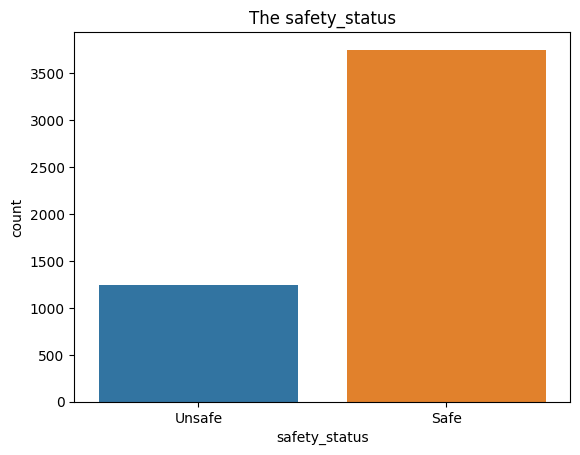

In [10]:
sns.countplot(x=df['safety_status'],data=df)
plt.title("The safety_status")
plt.show()

<Axes: ylabel='safety_status'>

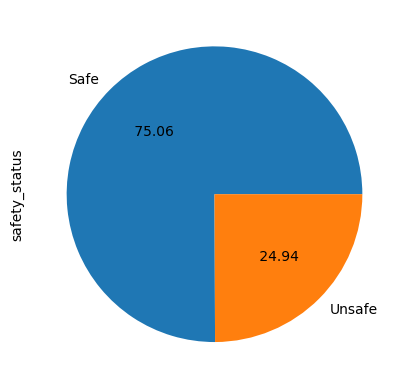

In [11]:
df['safety_status'].value_counts().plot(kind='pie',autopct='% .2f')

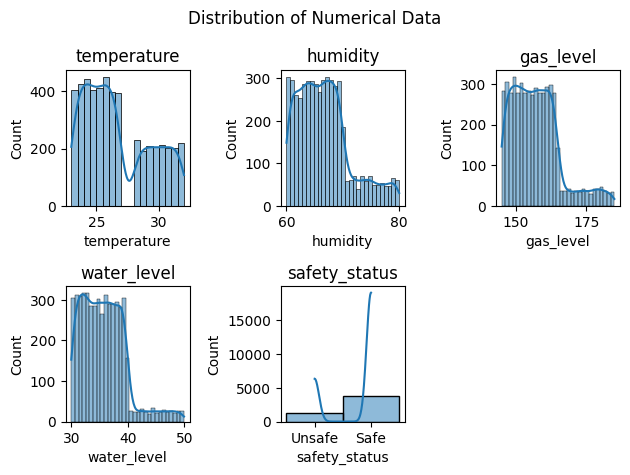

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with numerical data

num_vars = ['temperature', 'humidity', 'gas_level', 'water_level', 'safety_status']

try:
    plt.suptitle("Distribution of Numerical Data")
    for i in range(0, len(num_vars)):
        plt.subplot(2, 3, i + 1)  # Adjust the subplot grid based on the number of numerical variables
        sns.histplot(df[num_vars[i]], kde=True)  # Use histplot for numerical data
        plt.title(num_vars[i])
        plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)


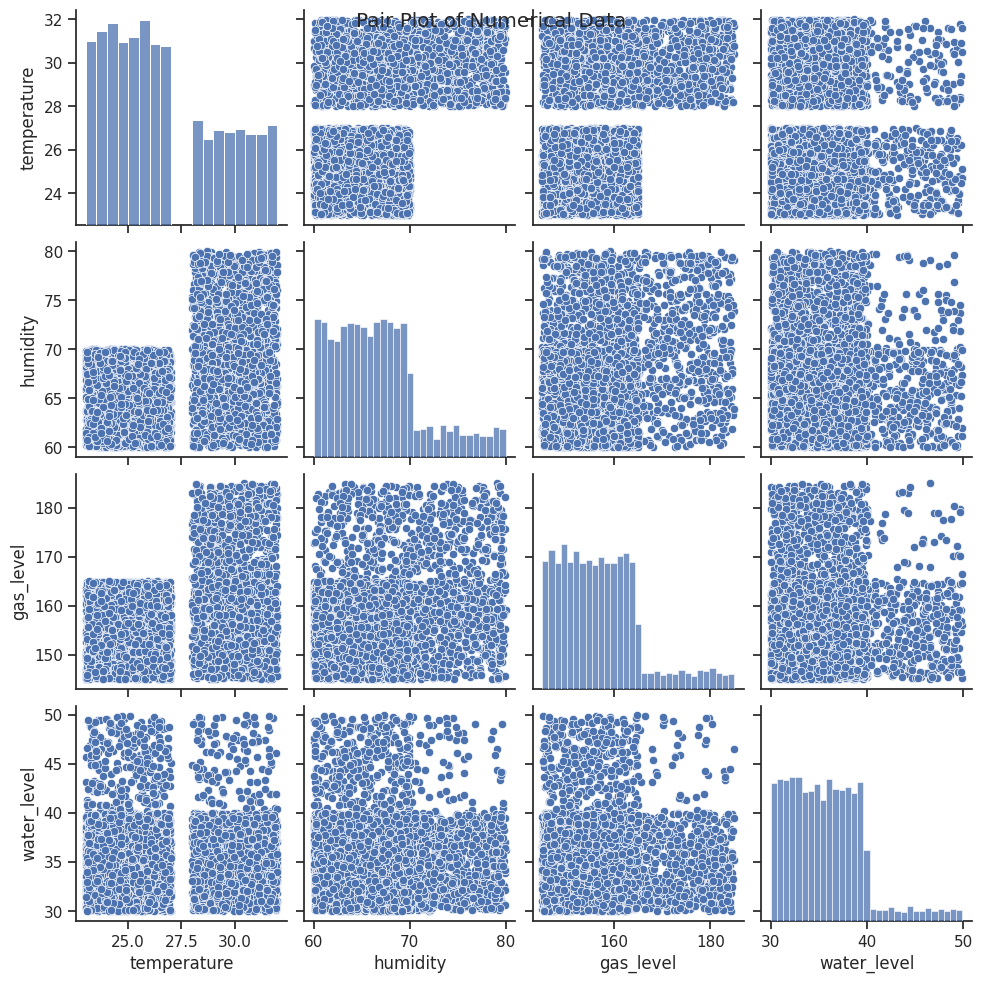

In [13]:
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with numerical data

num_vars = ['temperature', 'humidity', 'gas_level', 'water_level', 'safety_status']

try:
    sns.set(style="ticks")
    sns.pairplot(df[num_vars])
    plt.suptitle("Pair Plot of Numerical Data")
    plt.show()
except Exception as e:
    print(e)


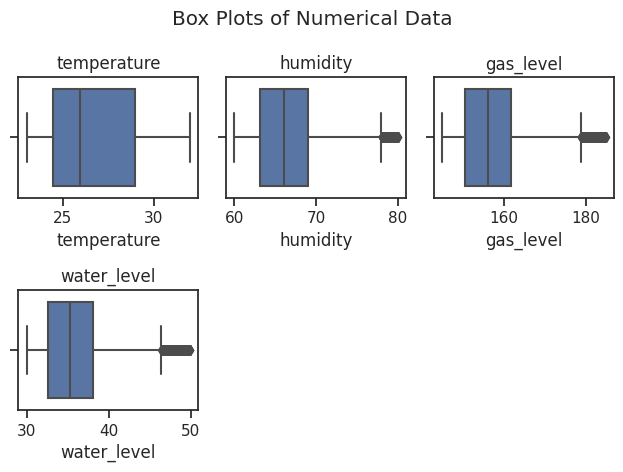

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical data
num_vars = ['temperature', 'humidity', 'gas_level', 'water_level', ]

try:
    plt.suptitle("Box Plots of Numerical Data")
    for i in range(0, len(num_vars)):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x=df[num_vars[i]])
        plt.title(num_vars[i])
        plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)


<ipython-input-15-e2a0cba2187f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


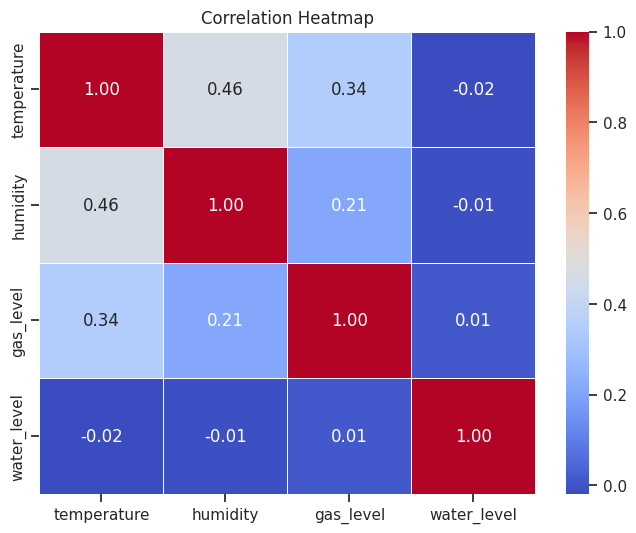

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical data
correlation_matrix = df.corr()

try:
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Correlation Heatmap")
    plt.show()
except Exception as e:
    print(e)


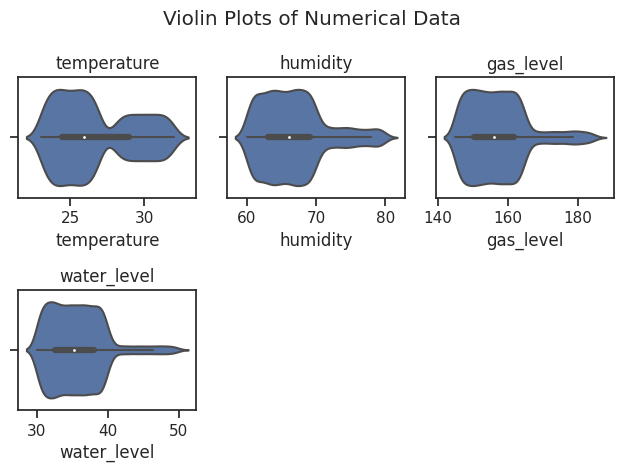

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical data
num_vars = ['temperature', 'humidity', 'gas_level', 'water_level',]

try:
    plt.suptitle("Violin Plots of Numerical Data")
    for i in range(0, len(num_vars)):
        plt.subplot(2, 3, i + 1)
        sns.violinplot(x=df[num_vars[i]])
        plt.title(num_vars[i])
        plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)


In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder() # removing categorical values using LabelEncoding
df['safety_status'] = le.fit_transform(df['safety_status'])

In [19]:
df.head()

,temperature,humidity,gas_level,water_level,safety_status
0,31.433940,79.391765,183.038027,43.372477,1
1,26.094985,64.221372,154.777017,39.420491,0
2,26.736718,64.136575,148.923478,36.030281,0
3,30.159079,60.350140,147.991583,34.549366,1
4,23.881175,60.133067,147.660890,32.726129,0


In [20]:
df.describe()

,temperature,humidity,gas_level,water_level,safety_status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,26.659579,66.673830,157.139420,35.704470,0.249400
std,2.627491,4.675111,8.568087,3.943970,0.432709
min,23.001532,60.001544,145.000156,30.001636,0.000000
25%,24.466548,63.077278,150.478763,32.591007,0.000000
50%,25.956217,66.093079,156.169864,35.306117,0.000000
75%,28.991834,69.036803,161.798504,38.096973,0.000000
max,31.999689,79.993206,184.951699,49.919217,1.000000


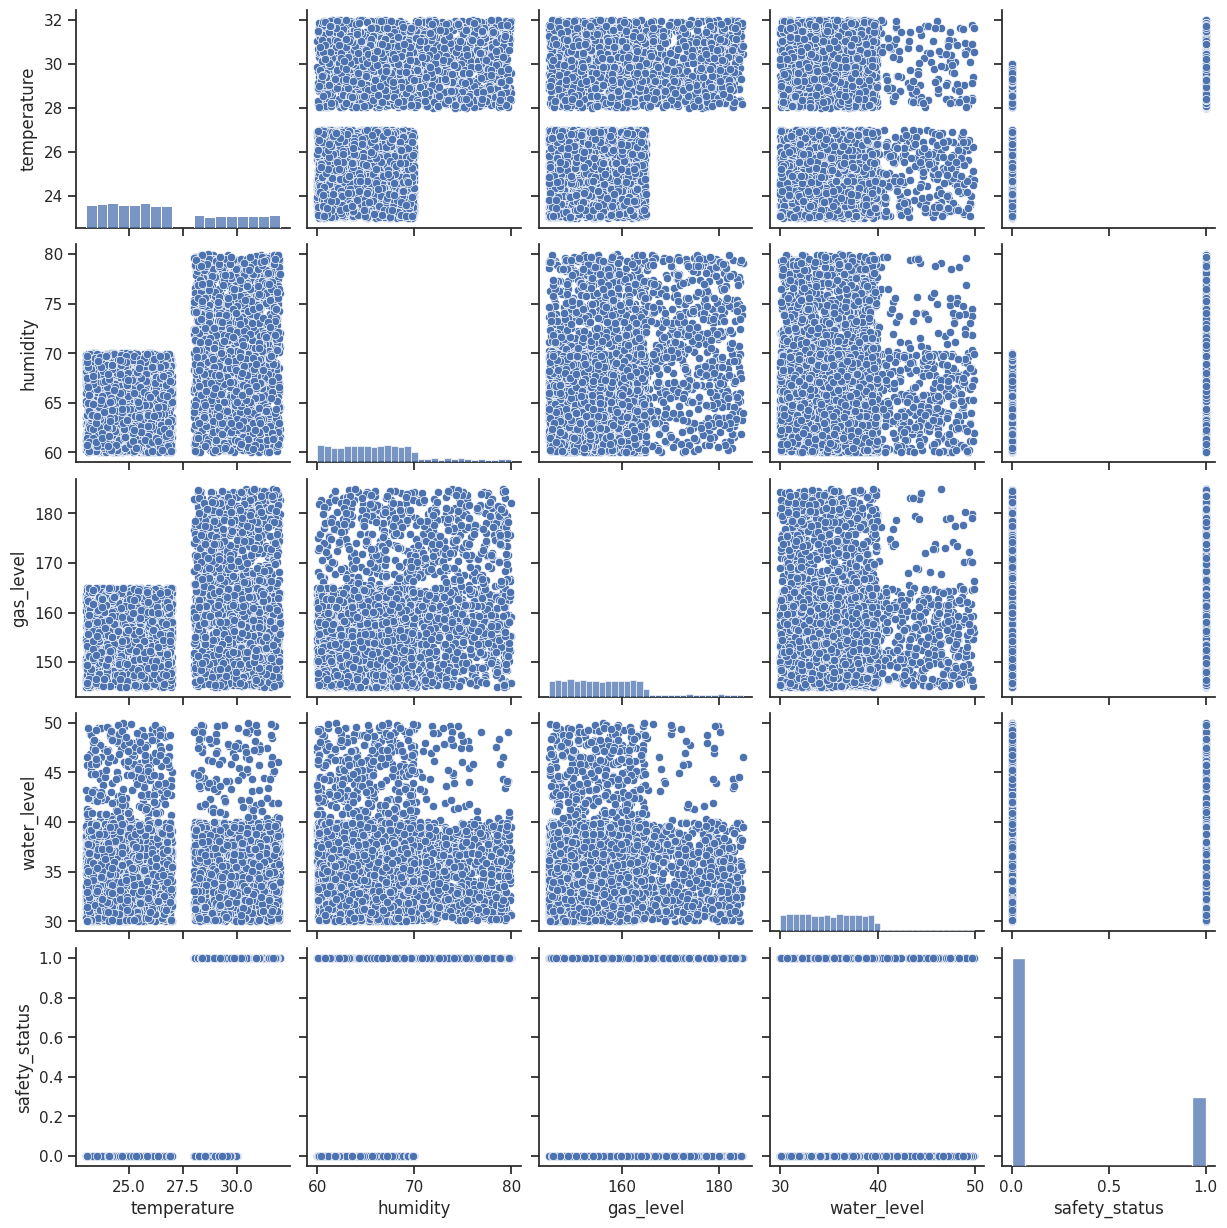

In [21]:
sns.pairplot(df)

<Axes: >

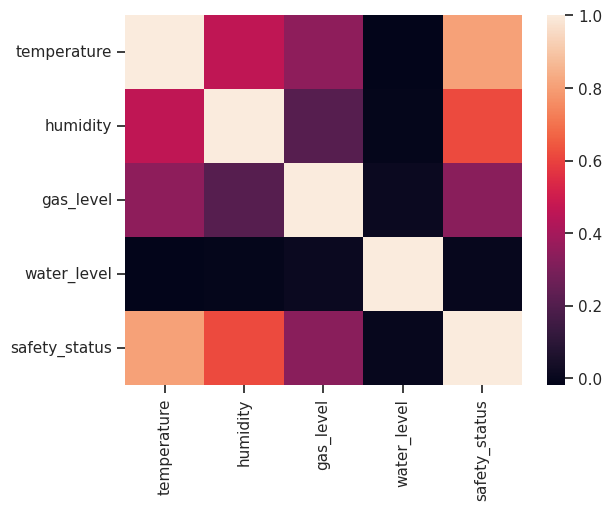

In [22]:
tc = df.corr()
sns.heatmap(tc)

In [23]:
x = df.drop(columns=['safety_status']) # spliting the feature variables into x.
x

,temperature,humidity,gas_level,water_level
0,31.433940,79.391765,183.038027,43.372477
1,26.094985,64.221372,154.777017,39.420491
2,26.736718,64.136575,148.923478,36.030281
3,30.159079,60.350140,147.991583,34.549366
4,23.881175,60.133067,147.660890,32.726129
...,...,...,...,...
4995,29.321936,61.866400,184.530625,35.540314
4996,26.896884,67.179460,154.165308,31.919307
4997,23.080548,69.719796,145.863702,33.972857
4998,29.860733,76.519151,156.242515,36.773775


In [24]:
y = df['safety_status']  # splitting the target variable into y
y

0       1
1       0
2       0
3       1
4       0
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: safety_status, Length: 5000, dtype: int64

In [25]:
# spliting the data into training data ,testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [26]:
x_train # x_train

,temperature,humidity,gas_level,water_level
2983,24.921566,64.756878,151.318068,35.428925
2181,29.925540,64.444285,154.280168,31.074321
4054,26.847523,67.495962,159.164869,36.223859
4748,25.943519,64.724376,150.411186,32.133103
4969,23.741333,61.436773,162.631534,37.312256
...,...,...,...,...
789,31.952105,62.034340,162.827176,35.335308
968,26.678586,61.216003,151.118400,37.189028
1667,23.816546,64.513895,164.501137,31.821578
3321,29.922839,67.000504,169.649439,39.587215


In [27]:
x_test  # x_test

,temperature,humidity,gas_level,water_level
2584,25.582719,69.153045,160.075316,39.145561
4338,29.792920,76.125329,176.373007,32.876193
4556,26.908172,62.584146,158.192308,39.232953
3438,29.998362,75.342355,181.451842,35.355733
737,25.831068,61.617712,150.586292,36.782758
...,...,...,...,...
2030,23.857691,65.989588,153.468356,38.518414
4390,26.924547,66.686647,157.958380,32.272691
3712,25.290999,66.709182,153.861685,34.989901
2147,25.090306,69.342961,160.541337,35.003877


In [28]:
y_train  # y_train

2983    0
2181    0
4054    0
4748    0
4969    0
       ..
789     1
968     0
1667    0
3321    0
1688    0
Name: safety_status, Length: 4000, dtype: int64

In [29]:
y_test  # y_test

2584    0
4338    1
4556    0
3438    1
737     0
       ..
2030    0
4390    0
3712    0
2147    0
2448    1
Name: safety_status, Length: 1000, dtype: int64

In [30]:
scaler = StandardScaler()   # scaling the dataset
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [31]:
# applying the logistic regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [32]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[707  15]
 [ 14 264]]
accuracy score 0.971
precision score  0.946236559139785
recall score  0.9496402877697842
f1 score  0.947935368043088


In [33]:
# applying Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [34]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for decision tree model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[722   0]
 [  0 278]]
accuracy score 1.0
precision score  1.0
recall score  1.0
f1 score  1.0


In [35]:
# applying random forest model
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier()
rdf = rdf.fit(x_train,y_train)
y_pred = rdf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [36]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for radom forest model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[722   0]
 [  0 278]]
accuracy score 1.0
precision score  1.0
recall score  1.0
f1 score  1.0


In [37]:
# applying svm model { support vector machine}
from sklearn.svm import SVC

svm = SVC()
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [38]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for svm model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[711  11]
 [ 44 234]]
accuracy score 0.945
precision score  0.9551020408163265
recall score  0.841726618705036
f1 score  0.8948374760994263


In [39]:
# applying Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()

nvb = nvb.fit(x_train,y_train)
y_pred = nvb.predict(x_test)
y_pred


array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [40]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for navie bayes model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[691  31]
 [  1 277]]
accuracy score 0.968
precision score  0.8993506493506493
recall score  0.9964028776978417
f1 score  0.9453924914675768


In [41]:
# applying KNN model to the dataset.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred


array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [42]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for KNN model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[711  11]
 [ 19 259]]
accuracy score 0.97
precision score  0.9592592592592593
recall score  0.9316546762589928
f1 score  0.9452554744525548


In [43]:
# comparision between all the models to find the best model with best accuracy.
models = [
    ('Logistic Regression', LogisticRegression()),
    ('k-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier())
]
results = []

# Train and evaluate models
for name, model in models:
    if 'scale' in dir(model):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
# Compare and print results
results.sort(key=lambda x: x[1], reverse=True)
for name, accuracy in results:
    print(f"{name}: Accuracy = {accuracy:.4f}")

Random Forest: Accuracy = 1.0000
Decision Tree: Accuracy = 1.0000
Logistic Regression: Accuracy = 0.9710
k-Nearest Neighbors: Accuracy = 0.9700
Naive Bayes: Accuracy = 0.9680
Support Vector Machine: Accuracy = 0.9450


In [44]:
df

,temperature,humidity,gas_level,water_level,safety_status
0,31.433940,79.391765,183.038027,43.372477,1
1,26.094985,64.221372,154.777017,39.420491,0
2,26.736718,64.136575,148.923478,36.030281,0
3,30.159079,60.350140,147.991583,34.549366,1
4,23.881175,60.133067,147.660890,32.726129,0
...,...,...,...,...,...
4995,29.321936,61.866400,184.530625,35.540314,0
4996,26.896884,67.179460,154.165308,31.919307,0
4997,23.080548,69.719796,145.863702,33.972857,0
4998,29.860733,76.519151,156.242515,36.773775,1


In [45]:
pred = rdf.predict([[31.433940,	79.391765,	183.038027,	43.372477,	]]) # testing the model with some values.
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [46]:
pred=rdf.predict([[25.862353,	69.912366	,164.051351,	34.073004		]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [47]:
import pickle # saving the model in the pickle file.
pickle.dump(rdf,open('sensor.pkl','wb'))

In [48]:
import pickle # saving the model in the pickle file.
pickle.dump(clf,open('idea.pkl','wb'))

In [49]:
import pickle # saving the model in the pickle file.
pickle.dump(lr,open('jio.pkl','wb'))